In [ ]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [ ]:
# Normalizing the dataset - is to change the values of numeric columns in the dataset to a common scale 
# without distorting differences in the ranges of values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
# reshape the dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [ ]:
# Building the model
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
# fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 119ms/step - loss: 0.0428
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0047
Epoch 13/100

In [ ]:
# Extracting the actual stock prices of Jan 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
# Preparing the input for the model 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


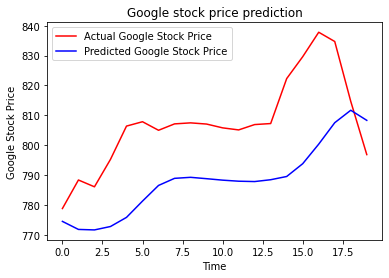

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()